In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [38]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x, y], axis=1)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

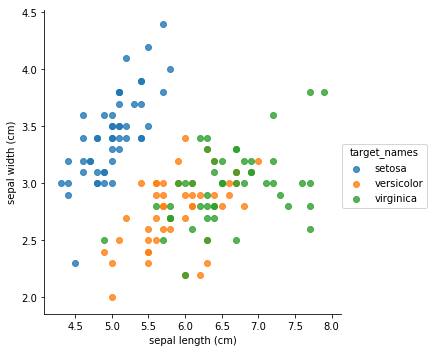

In [40]:
target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}
iris_data['target_names'] = iris_data['target'].map(target_names)
sns.lmplot('sepal length (cm)', 'sepal width (cm)', data=iris_data, fit_reg=False, hue='target_names')

In [41]:
iris_data = iris_data[(iris_data['target_names'] == 'setosa')|(iris_data['target_names'] == 'versicolor')]
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target_names']]
target_class = {
    'setosa':1,
    'versicolor':-1,
    'virginica':0
}
iris_data['target_class'] = iris_data['target_names'].map(target_class)
iris_data.head(10)

,sepal length (cm),petal length (cm),target_names,target_class
0,5.1,1.4,setosa,1
1,4.9,1.4,setosa,1
2,4.7,1.3,setosa,1
3,4.6,1.5,setosa,1
4,5.0,1.4,setosa,1
5,5.4,1.7,setosa,1
6,4.6,1.4,setosa,1
7,5.0,1.5,setosa,1
8,4.4,1.4,setosa,1
9,4.9,1.5,setosa,1


In [9]:
def sign(z):
    return 1 if z>0 else -1

In [24]:
w = np.array([0.,0.,0.])
error = 1
while error != 0:
    error = 0
    for i in range(len(iris_data)):
        x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[3]

        if sign(np.dot(w,x)) != y:
            error += 1
            w = w + y*x         
print(w)

[2.0 3.3999999999999977 -9.100000000000001]


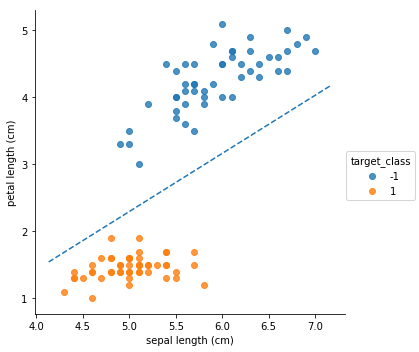

In [62]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
raw_mean = iris_data.groupby(by='target_class').mean()

sns.lmplot('sepal length (cm)','petal length (cm)',data=iris_data, fit_reg=False, hue ='target_class')

abline(-(w[1]/w[2]), [0, 1.5])